# Visualization of Covariance Discriminative Analysis.

This file shows the distribution of backdoored and benign samples, calculated by Covariance Discriminative Analysis.

In [2]:
import numpy as np
import torch
from tqdm import tqdm
import random
import os
import numpy as np 
import matplotlib.pyplot as plt 
import pickle


In [3]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    
    torch.cuda.manual_seed(seed)
    # # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed(42)

Random seed set as 42


In [5]:
X = np.load('../data/attention_maps/train/all_data.npy', allow_pickle=True)
y = np.load('../data/attention_maps/train/all_label.npy', allow_pickle=True)
len_N = np.load('../data/attention_maps/train/all_len.npy', allow_pickle=True)

In [6]:
X = X.reshape(X.shape[0],-1)
X.shape

(6000, 400)

In [7]:
len_N[:10]

array([24, 14, 46, 43, 40, 27, 22, 21, 66, 14])

In [8]:
with open('../models/train_model_reman_lda.pkl', 'rb') as f:
    lda = pickle.load(f)
X_new = lda.transform(X)

In [9]:
for index in range(len(y)):
    if y[index] == 1:
        print(index)
        break

375


In [10]:
benign_data = []
backdoor_data = []
for i in range(len(y)):
    if y[i] == 0:
        backdoor_data.append(X_new[i,0])
    else:
        benign_data.append(X_new[i,0])

benign_len = []
backdoor_len = []
for i in range(len(y)):
    if y[i] == 0:
        backdoor_len.append(len_N[i])
    else:
        benign_len.append(len_N[i])


C:\Users\24857\AppData\Local\Temp\ipykernel_28340\726527929.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(backdoor_data, color="red", shade=True, label="Backdoor Samples")
C:\Users\24857\AppData\Local\Temp\ipykernel_28340\726527929.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(benign_data, color="skyblue", shade=True, label="Benign Samples")


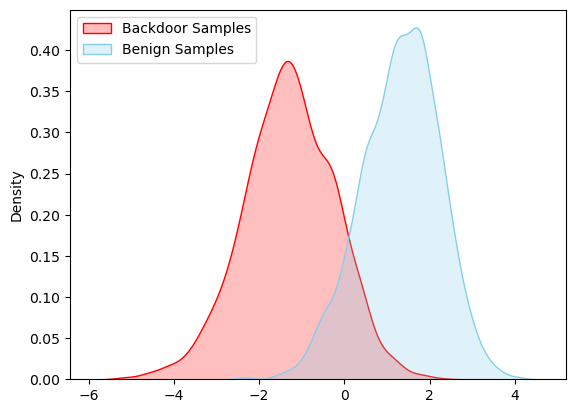

In [11]:
import seaborn as sns
from scipy.stats import norm

sns.kdeplot(backdoor_data, color="red", shade=True, label="Backdoor Samples")
sns.kdeplot(benign_data, color="skyblue", shade=True, label="Benign Samples")

plt.legend(loc="upper left")
plt.show()


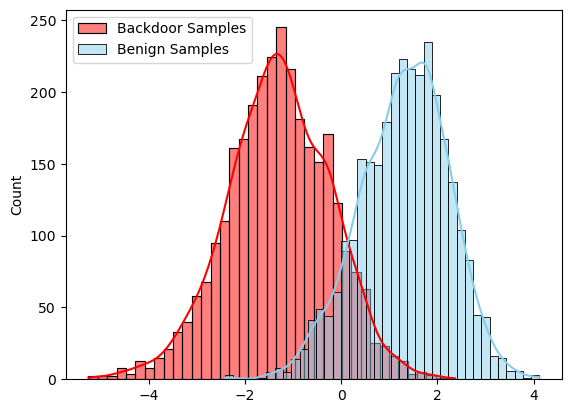

In [12]:
import seaborn as sns

sns.histplot(backdoor_data, color="red", kde=True, label="Backdoor Samples")
sns.histplot(benign_data, color="skyblue", kde=True, label="Benign Samples")

plt.legend()
plt.show()